<table>
<tr>
<td width=15%><img src="Datathon Logo.png"></img></td>
<td><center><h1>Data With Python - Jahez</h1></center></td>
</tr>
</table>


<br/><br/>

<center><a style="font-size: 40pt; font-weight: bold">Chap. 2 - Data Manipulation </a></center> 

<br/><br/>

### Dataset
the data set is taking from [Open Data Platform](https://open.data.gov.sa/en/datasets/view/cc3b177a-5e5d-4845-bb92-6119b1322b05) provided by SDAIA, the data contains 2021 Quarterly Donation Collection for Ehsan Platform 

### Import Libraries 

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Reading data 

#### 1. CSV (Comma Separated Values)
- **Description**: CSV is a simple, text-based format that separates values with commas. It is widely supported and easy to import and export from many types of software.
- **Use Case**: Ideal for data sharing between different programs and for situations where human readability is important. CSV files are especially useful for small to medium datasets.

#### 2. XLSX (Excel File)
- **Description**: XLSX is the default file format for Microsoft Excel. It supports features like formulas, formatting, and more, which are not possible in plain text formats like CSV.
- **Use Case**: Best used when the data requires complex structuring, the use of formulas, or when the data needs to be shared in a professionally formatted manner. It is also suitable for reporting and data analysis purposes where Excel's advanced features are needed.

#### 3. XML (eXtensible Markup Language)
- **Description**: XML is a markup language that defines a set of rules for encoding documents in a format that is both human-readable and machine-readable. It supports complex data structures.
- **Use Case**: Ideal for data interchange among systems and applications that require a structured and extensible format, such as web services. It is also useful when data integrity and validation are critical, thanks to its support for schemas and transformation capabilities.

#### 4. JSON (JavaScript Object Notation)
- **Description**: JSON is a lightweight data-interchange format that is easy for humans to read and write, and easy for machines to parse and generate. It uses text to organize data into objects and arrays.
- **Use Case**: Particularly useful for APIs and web services, where payloads need to be compact and data exchange speed is crucial. JSON is highly favored in web applications for client-server communication.

#### 5. Parquet
- **Description**: Parquet is a columnar storage file format optimized for use with Big Data ecosystems. It provides efficient data compression and encoding schemes.
- **Use Case**: Excellent for handling large datasets where performance and storage efficiency are crucial. It is widely used in data analysis systems that perform complex data processing and querying operations, such as Apache Hadoop and Apache Spark.

#### 6. Pickle (Python Object Serialization)
- **Description**: Pickle is a Python-specific binary serialization format which is not human-readable. It allows for the serialization of Python objects, including complex data structures like pandas DataFrames.
- **Use Case**: Useful for short-term storage of Python objects, or sending data between Python programs. Note that it is not suitable for long-term storage or for situations requiring interoperability with programs written in other languages.

These different formats serve various purposes ranging from enhancing performance, supporting specific features, ensuring compatibility across different applications, maintaining human readability, or meeting specific data interchange requirements. Choosing the right format depends on the specific needs of the task at hand.


In [62]:
# Reading the CSV file
df_csv = pd.read_csv('Donations.csv')

In [ ]:
# Reading the data from the XLSX file
df_xlsx = pd.read_excel('Donations.xlsx')

df_xml = pd.read_xml('Donations.xml')

# Reading the data from the JSON file
df_json = pd.read_json('Donations.json')

# Reading from Parquet
df_parquet = pd.read_parquet('Donations.parquet')

# Reading from Pickle
df_pickle = pd.read_pickle('Donations.pkl')

### Exploratory Data Analysis (EDA) Overview

#### Understanding the Data Structure

1. **General Structure**
   - Use `df_csv.info()` to get a concise summary of the DataFrame, including the number of entries, the total number of columns, each column's data type, and the number of non-null entries. This helps in identifying if any columns have missing values and the memory usage of the dataset.

2. **Statistical Summary**
   - The `df_csv.describe()` function provides a statistical summary of all numerical columns by default, which includes count, mean, standard deviation, minimum, quartiles, and maximum values. This is crucial for getting a quick overview of the data's distribution and spotting any obvious outliers or errors in the dataset.

3. **Previewing Data**
   - Viewing the first few rows with `df_csv.head()` allows us to see actual dataset entries. This helps in understanding the format of the data, the type of values contained in each column, and how they are organized.

4. **Missing Values Check**
   - Using `df_csv.isnull().sum()` will show the count of missing values in each column. Handling missing data is an essential step in data preprocessing to ensure the quality of your analysis.

Each of these steps is essential for gaining a preliminary understanding of the dataset and preparing for more in-depth analysis. They provide the foundational knowledge needed to make informed decisions about data cleaning, transformation, and analysis techniques to apply later in the process.


In [63]:
# Display the general structure of the DataFrame
print("DataFrame Information:")
df_csv.info()

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40931 entries, 0 to 40930
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   UserID          40931 non-null  object
 1   CreationTime    40931 non-null  object
 2   Title           40930 non-null  object
 3    Amount         40931 non-null  object
 4   InitiativeName  40931 non-null  object
 5   PaymentMethod   40931 non-null  object
dtypes: object(6)
memory usage: 1.9+ MB


In [64]:
# Get and print a concise summary of the DataFrame
print("\n\nDataFrame Statistical Summary:")
df_csv.describe(include='all')  # 'include=all' to show statistics for all columns, including categorical



DataFrame Statistical Summary:


,UserID,CreationTime,Title,Amount,InitiativeName,PaymentMethod
count,40931,40931,40930,40931,40931,40931
unique,1371,34366,1774,216,22,3
top,UCU4,4/9/2022 10:52,تبرع يومي - رعاية الأيتام,10,مشروع,أبل باى
freq,884,37,4539,12418,15091,22658


In [65]:
# Display the first few rows of the DataFrame
print("\n\nDataFrame Head (First Few Rows):")
df_csv.head()



DataFrame Head (First Few Rows):


,UserID,CreationTime,Title,Amount,InitiativeName,PaymentMethod
0,U4F1,5/2/2021 2:21,دعم الأسر المعسرة,50,مشروع,بطاقة الدفع
1,U4F1,5/2/2021 2:31,كفالة الأيتام,100,مشروع,بطاقة الدفع
2,U042,9/30/2022 15:19,سقيا الماء,2,مشروع,بطاقة الدفع
3,U042,11/3/2021 7:27,عمليات القلب الجراحية للأطفال,1,إغاثة,بطاقة الدفع
4,U042,9/30/2022 15:27,سقيا الماء,2,مشروع,بطاقة الدفع


In [66]:
# Check and print for missing values in the DataFrame
print("\n\nMissing Values in DataFrame:")
df_csv.isnull().sum()



Missing Values in DataFrame:


UserID            0
CreationTime      0
Title             1
 Amount           0
InitiativeName    0
PaymentMethod     0
dtype: int64

### Adjusting Column Data Types and Handling Missing Values

In data analysis, it's crucial to ensure that each column in our dataset is of the correct data type and that missing values are handled appropriately to avoid errors in our analysis.

#### Converting 'CreationTime' to DateTime

The 'CreationTime' column contains timestamp information, but when we read data from a CSV file, it's often interpreted as a string (or `object` in pandas). To perform time series analysis or operations like sorting by date, we need to convert this column to `datetime`. We can do this using the `pd.to_datetime()` function, which is built into pandas:

```python
df_csv['CreationTime'] = pd.to_datetime(df_csv['CreationTime'])


In [67]:
# Convert the 'CreationTime' column to datetime
df_csv['CreationTime'] = pd.to_datetime(df_csv['CreationTime'])

# Convert the 'Amount' column to Numbers
df_csv[' Amount '] = df_csv[' Amount '].str.replace(',', '').str.strip()
df_csv[' Amount '] = df_csv[' Amount '].str.replace('-', '0').str.strip()

df_csv[' Amount '] = pd.to_numeric(df_csv[' Amount '])

# Drop rows where 'Title' is null
df_csv.dropna(subset=['Title'], inplace=True)

Set Charts Color and Arabic Handeler

!pip install matplotlib seaborn pandas arabic_reshaper python-bidi

In [25]:
import arabic_reshaper
from bidi.algorithm import get_display

palette = ["#0084bd", "#fe3b1f"]  # Hex values for the blue and red 

def reshape_arabic(text):
    reshaped_text = arabic_reshaper.reshape(text)  # Reshape text
    return get_display(reshaped_text)  # Correct the direction

plt.rcParams['font.family'] = 'DejaVu Sans'

for column in ['Title', 'InitiativeName', 'PaymentMethod']:
    new_columns = column+'_arabic'
    df_csv[new_columns] = df_csv[column].apply(reshape_arabic)

### Understand your data


Frequency of values in column 'Title':
Title
تبرع يومي - رعاية الأيتام         4539
تبرع يومي - سقيا الماء            3344
تبرع سريع - توكلنا                2898
صدقة                              1581
تبرع يومي - إعانة المعسرين        1325
إعانة السجناء                     1259
تبرع يومي - الرعاية الصحية        1040
تفريج كرب                         1011
تبرع سريع - فرص عامة              1001
تفريج كربة                         801
تبرع يومي - الأوقاف                794
سقيا الماء                         629
الكفالة السنوية للأيتام            625
زكاة الفطر                         462
الهدية                             446
كفالة الأيتام                      443
السلال الغذائية للأسر المحتاجة     423
وجبات إفطار الصائمين               339
إعانة سجناء                        335
تبرع سريع - تيسرت                  295
Name: count, dtype: int64




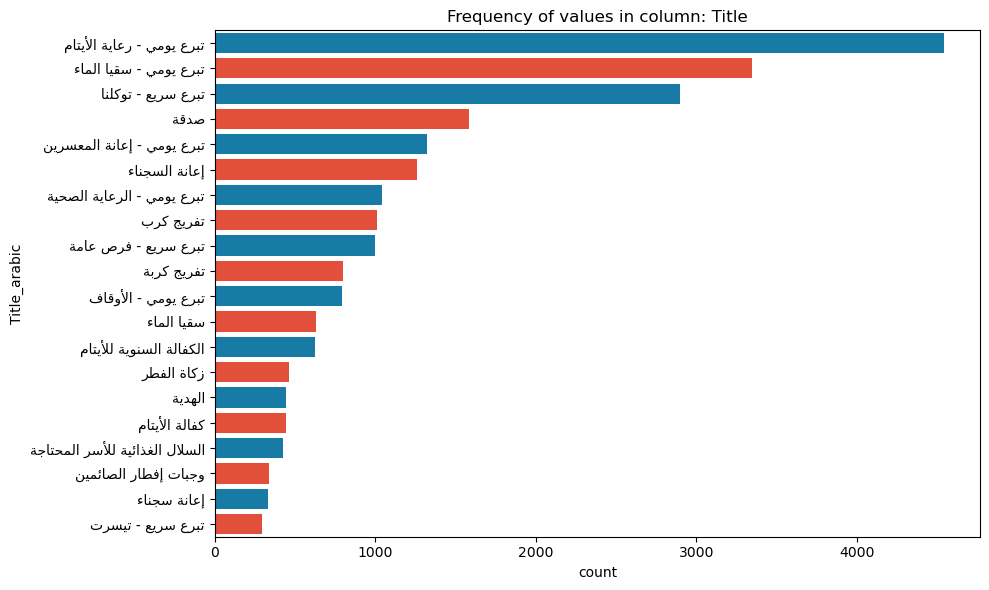

Frequency of values in column 'InitiativeName':
InitiativeName
مشروع                    15091
التبرع الدوري            11274
فرصة عامة                 3100
إغاثة                     2370
الحملات المخصصة           2086
فرجت                      1598
فرجت - تبرع سريع           991
تيسرت - تبرع سريع          801
المتجر                     713
العناية بالمساجد           541
الهدية                     494
زكاة الفطر                 462
تيسرت التنفيذ القضائي      437
الأوقاف                    290
تملك المساكن               232
تيسرت الكهرباء             205
كفالة الأيتام              132
الأضاحي                     65
زكاة                        34
زكاة المال                  11
Name: count, dtype: int64




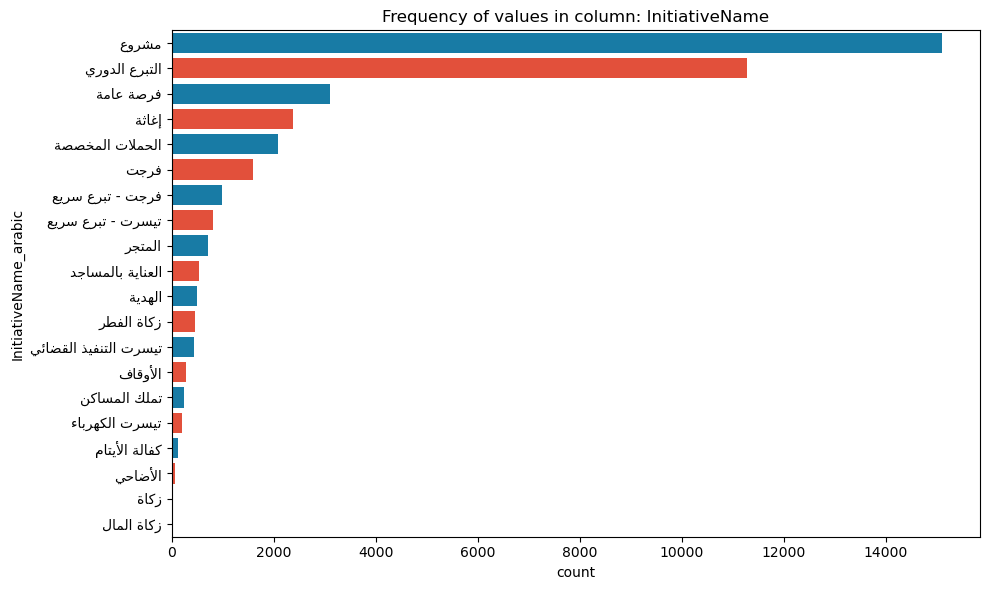

Frequency of values in column 'PaymentMethod':
PaymentMethod
أبل باى        22657
بطاقة الدفع    18159
نقاط قطاف        114
Name: count, dtype: int64




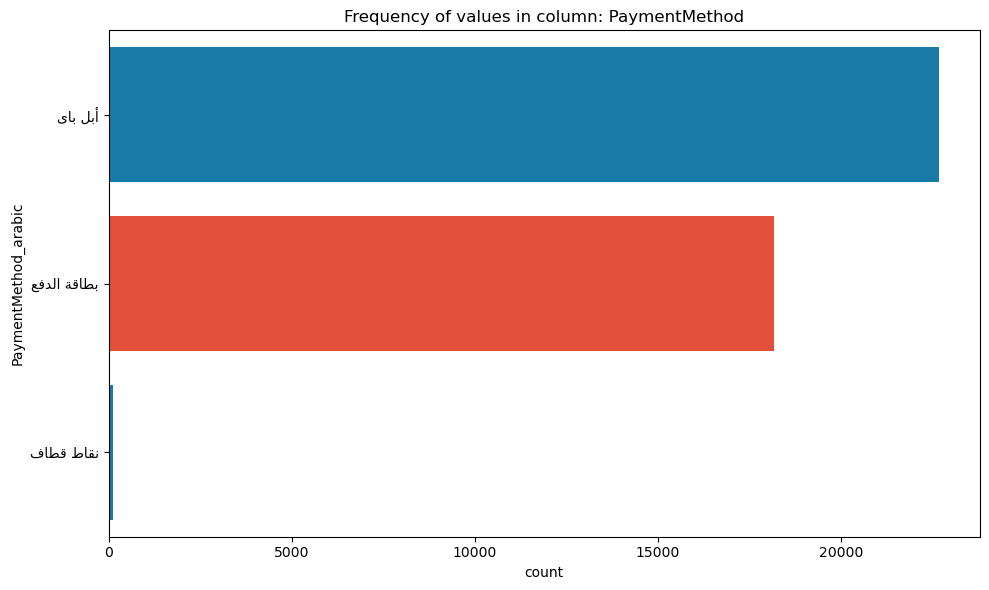

In [22]:
# Frequency counts and visualizations for each column
for column in ['Title', 'InitiativeName','PaymentMethod']:
    new_columns = column+'_arabic'
    # Show the frequency of values for each column
    print(f"Frequency of values in column '{column}':")
    print(df_csv[column].value_counts()[:20])
    print("\n")
    
 
    # If categorical, we create a count plot
    plt.figure(figsize=(10, 6))
    sns.countplot(y=new_columns, data=df_csv, order=df_csv[new_columns].value_counts()[:20].index, palette=palette)
    plt.title(f'Frequency of values in column: {column}')

    plt.tight_layout()
    plt.show()

### Automated Exploratory Data Analysis with Pandas Profiling

Exploratory Data Analysis (EDA) is a crucial step in the data science process. It allows us to understand the data before we dive into more complex analysis. However, EDA can be time-consuming when done manually. That's where `pandas_profiling` comes in, automating most of the routine EDA tasks.

#### Generating the Report

With `pandas_profiling`, we can generate a full report of our dataset with minimal code:

```python
profile = ProfileReport(df_csv, title='Pandas Profiling Report', explorative=True)


!pip install pandas-profiling

In [72]:
from pandas_profiling import ProfileReport

df_csv['Title'] = df_csv['Title'].astype('category') # convert it into Category datatype
profile = ProfileReport(df_csv, title='Pandas Profiling Report', explorative=True)

In [ ]:
# To save the report as an HTML file:
profile.to_file("report.html")

In [74]:
# display the report within the notebook:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Gathering Insights From Data

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


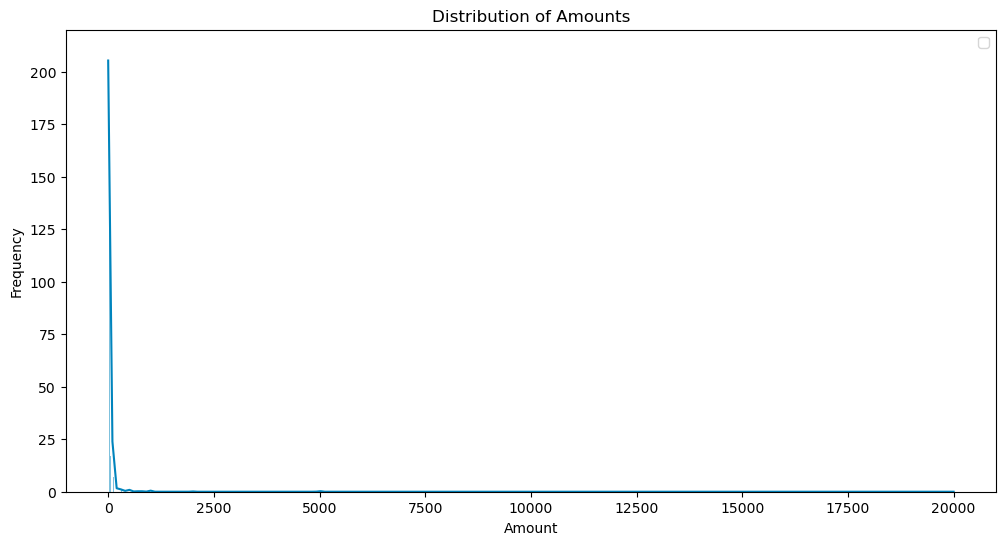

In [55]:
# Plot the distribution of 'Amount'
plt.figure(figsize=(12, 6))
sns.histplot(df_csv['Amount'], kde=True, color="#0084bd")

# Add title and legend to the plot
plt.title('Distribution of Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.ylim(0, 220)
plt.legend()

zoom in

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


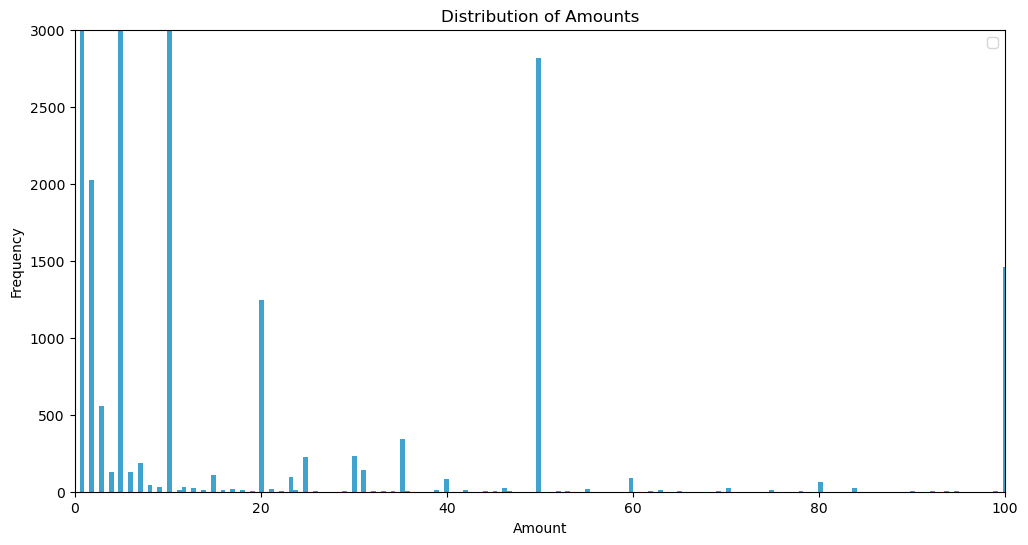

In [59]:
# Plot the distribution of 'Amount'
plt.figure(figsize=(12, 6))
sns.histplot(df_csv['Amount'], color="#0084bd")

# Add title and legend to the plot
plt.title('Distribution of Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.ylim(0, 3000)
plt.xlim(0, 100)
plt.legend()

Answering questions

In [68]:
# Calculate the average (mean), median, and total spending.
average_spending = df_csv[' Amount '].mean()
median_spending = df_csv[' Amount '].median()
total_spending = df_csv[' Amount '].sum()

total_customers = df_csv.nunique().UserID.sum()
total_transaction = df_csv.shape[0]



# Print the calculated statistics.
print(f"The average (mean) customer spending is: SAR{average_spending:.2f}")
print(f"The median customer spending is: SAR{median_spending:.2f}")
print(f"The total spending across all customers is: SAR{total_spending:.2f}")
print(f"The total customers: {total_customers:}")
print(f"The total transactions: {total_transaction:}")

The average (mean) customer spending is: SAR37.56
The median customer spending is: SAR10.00
The total spending across all customers is: SAR1537495.00
The total customers: 1371
The total transactions: 40930


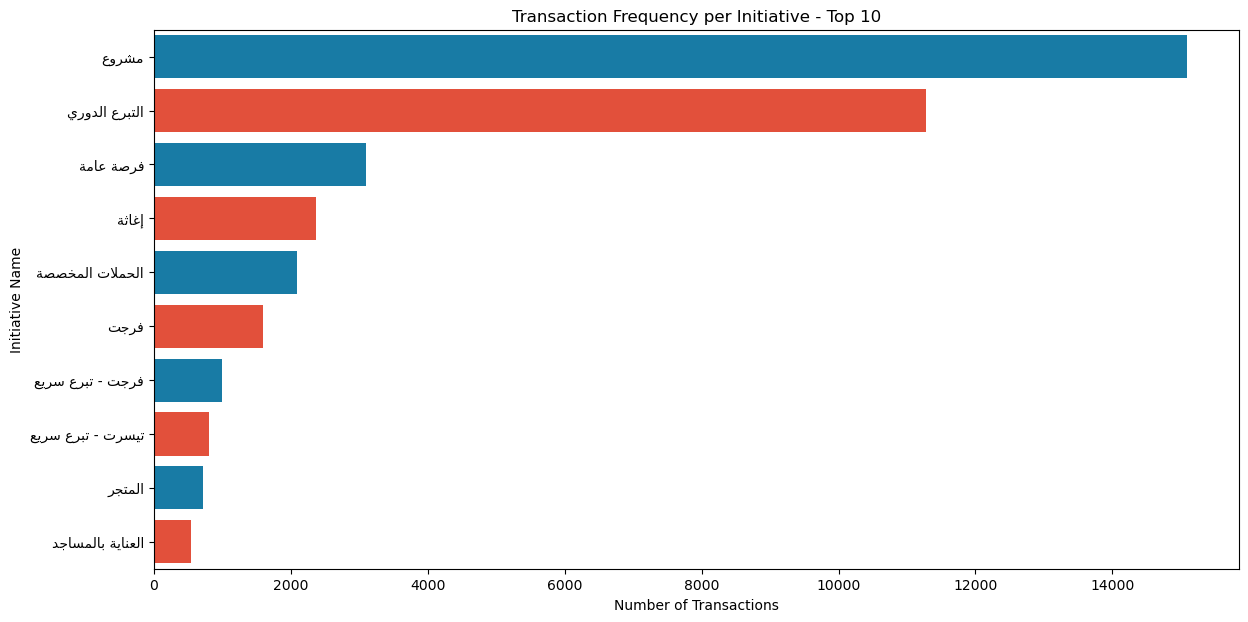

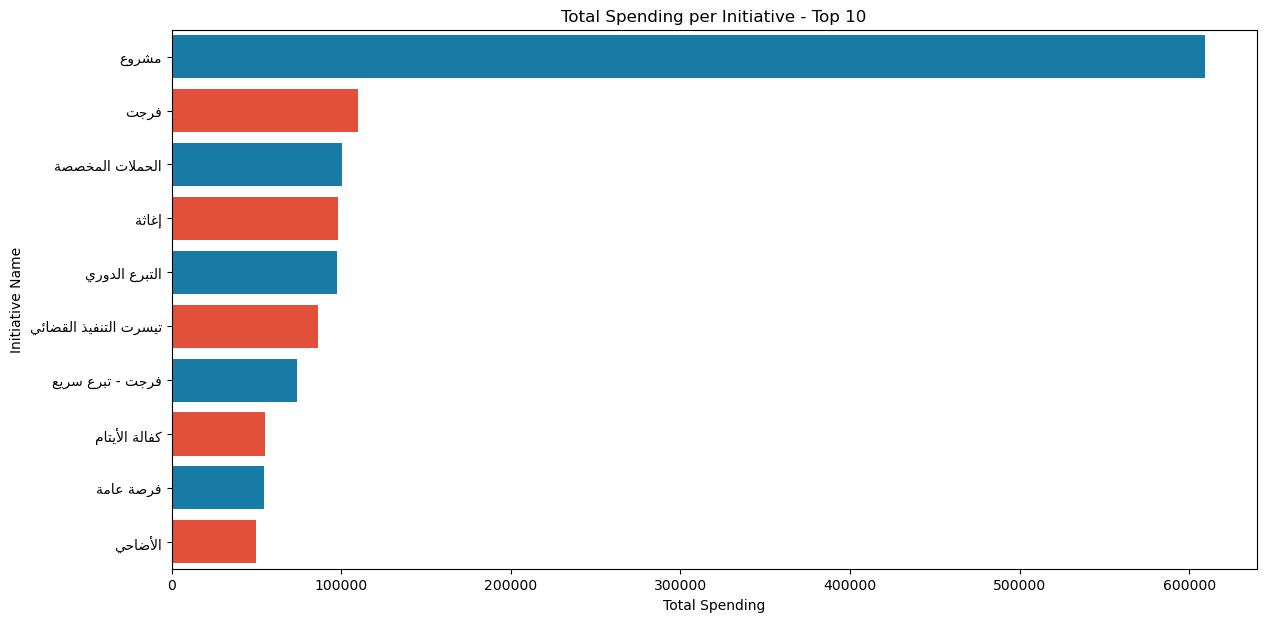

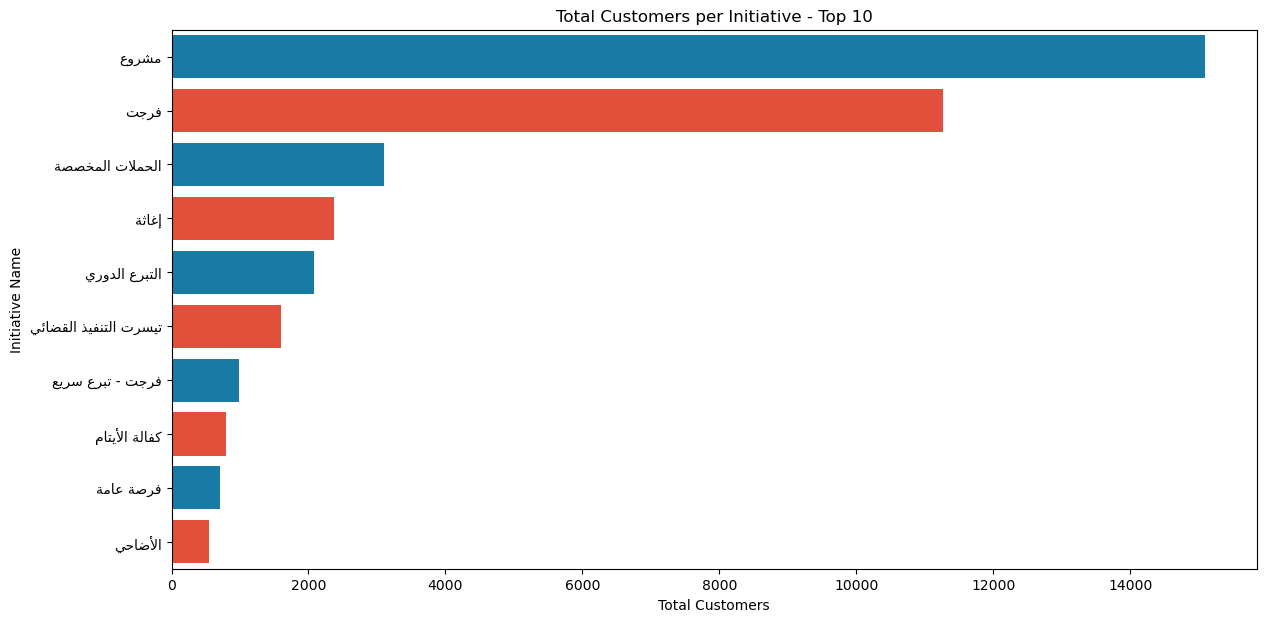

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the 'Amount' column is numeric
df_csv[' Amount '] = pd.to_numeric(df_csv[' Amount '], errors='coerce')

# Calculate the total spending for each initiative and get the top 10
total_spending_per_initiative = df_csv.groupby('InitiativeName_arabic')[' Amount '].sum().nlargest(10)

# Calculate the total spending for each initiative and get the top 10
total_cusomers_per_initiative = df_csv.groupby('InitiativeName_arabic')['UserID'].count().nlargest(10)


# Calculate the frequency of transactions for each initiative and get the top 10
transaction_frequency_per_initiative = df_csv['InitiativeName_arabic'].value_counts().nlargest(10)

# Define your color palette
palette = ["#0084bd", "#fe3b1f"]

# Plotting transaction frequency per initiative
plt.figure(figsize=(14, 7))
sns.barplot(y=transaction_frequency_per_initiative.index, x=transaction_frequency_per_initiative.values, palette=palette)
plt.title('Transaction Frequency per Initiative - Top 10')
plt.xlabel('Number of Transactions')
plt.ylabel('Initiative Name')
plt.show()

# Plotting total spending per initiative
plt.figure(figsize=(14, 7))
sns.barplot(y=total_spending_per_initiative.index, x=total_spending_per_initiative.values, palette=palette)
plt.title('Total Spending per Initiative - Top 10')
plt.xlabel('Total Spending')
plt.ylabel('Initiative Name')
plt.show()

# Plotting total customers per initiative
plt.figure(figsize=(14, 7))
sns.barplot(y=total_spending_per_initiative.index, x=total_cusomers_per_initiative.values, palette=palette)
plt.title('Total Customers per Initiative - Top 10')
plt.xlabel('Total Customers')
plt.ylabel('Initiative Name')
plt.show()



---